In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()

# Acceder a los datos
data = iris.data
target = iris.target
target_names = iris.target_names

# Imprimir información
print("Datos (primeras 5 filas):")
print(data[:5])

print("\nObjetivo (primeras 5 filas):")
print(target[:5])

print("\nNombres de los objetivos:")
print(target_names)

# Crear DataFrame utilizando Pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Añadir la columna "Species" a partir de la secuencia de datos target
df['Species'] = iris.target_names[iris.target]

# Mostrar los primeros registros del nuevo dataset
print("Primeros registros del dataset:")
print(df.head())

# Mostrar los principales valores estadísticos del dataset
print("\nDescripción estadística del dataset:")
print(df.describe())

Datos (primeras 5 filas):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Objetivo (primeras 5 filas):
[0 0 0 0 0]

Nombres de los objetivos:
['setosa' 'versicolor' 'virginica']
Primeros registros del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Descripción estadística del dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333  

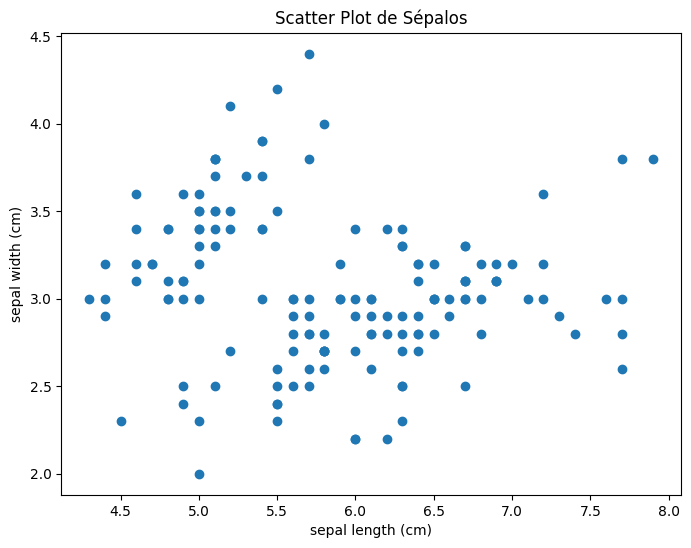

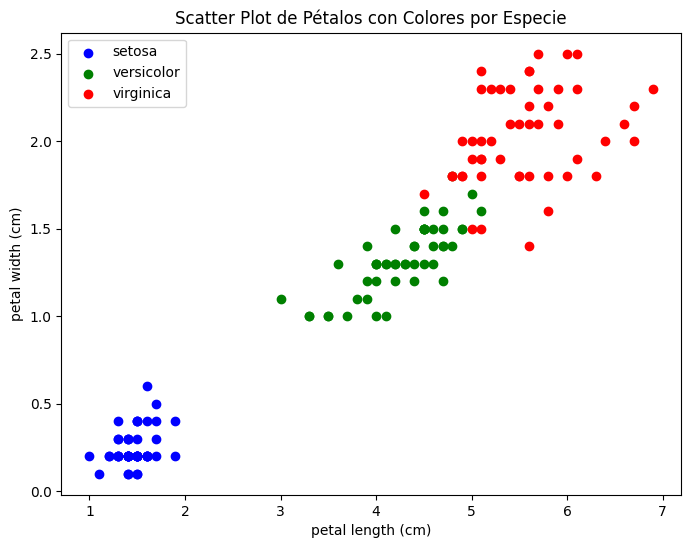

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()

# Crear DataFrame utilizando Pandas
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target_names[iris.target]

# Scatter plot de sépalos (sepal length vs sepal width)
plt.figure(figsize=(8, 6))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.title('Scatter Plot de Sépalos')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# Scatter plot de pétalos (petal length vs petal width) con colores por especie
plt.figure(figsize=(8, 6))
colors = {'setosa': 'blue', 'versicolor': 'green', 'virginica': 'red'}
for species, color in colors.items():
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['petal length (cm)'], species_data['petal width (cm)'],
                label=species, color=color)
plt.title('Scatter Plot de Pétalos con Colores por Especie')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Logística con solucionador 'liblinear'
logistic_model = LogisticRegression(solver='liblinear', max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Precisión del modelo de Regresión Logística: {logistic_accuracy:.4f}")

# Modelo de Máquinas de Vectores de Soporte (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"Precisión del modelo de SVM: {svm_accuracy:.4f}")

# Modelo de K vecinos más cercanos (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"Precisión del modelo de KNN: {knn_accuracy:.4f}")

# Modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
print(f"Precisión del modelo de Árbol de Decisión: {tree_accuracy:.4f}")



Precisión del modelo de Regresión Logística: 1.0000
Precisión del modelo de SVM: 1.0000
Precisión del modelo de KNN: 1.0000
Precisión del modelo de Árbol de Decisión: 1.0000


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['Species'] = iris.target_names[iris.target]

# Crear un nuevo dataset solo con las columnas de las dimensiones de los sépalos y la de la especie
sepal_data = data[['sepal length (cm)', 'sepal width (cm)', 'Species']]

# Separar los datos en variables de entrada (X_sepalo) y variable de salida (y_sepalo)
X_sepalo = sepal_data.drop('Species', axis=1)
y_sepalo = sepal_data['Species']

# Separar los datos en conjuntos de entrenamiento y prueba
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sepalo, y_sepalo, test_size=0.2, random_state=42)

# Modelo de Regresión Logística
logistic_model_s = LogisticRegression(solver='liblinear', max_iter=1000)
logistic_model_s.fit(X_train_s, y_train_s)
logistic_predictions_s = logistic_model_s.predict(X_test_s)
logistic_accuracy_s = accuracy_score(y_test_s, logistic_predictions_s)
print(f"Precisión del modelo de Regresión Logística (sépalos): {logistic_accuracy_s:.4f}")

# Modelo de Máquinas de Vectores de Soporte (SVM)
svm_model_s = SVC()
svm_model_s.fit(X_train_s, y_train_s)
svm_predictions_s = svm_model_s.predict(X_test_s)
svm_accuracy_s = accuracy_score(y_test_s, svm_predictions_s)
print(f"Precisión del modelo de SVM (sépalos): {svm_accuracy_s:.4f}")

# Modelo de K vecinos más cercanos (KNN)
knn_model_s = KNeighborsClassifier()
knn_model_s.fit(X_train_s, y_train_s)
knn_predictions_s = knn_model_s.predict(X_test_s)
knn_accuracy_s = accuracy_score(y_test_s, knn_predictions_s)
print(f"Precisión del modelo de KNN (sépalos): {knn_accuracy_s:.4f}")

# Modelo de Árbol de Decisión
tree_model_s = DecisionTreeClassifier()
tree_model_s.fit(X_train_s, y_train_s)
tree_predictions_s = tree_model_s.predict(X_test_s)
tree_accuracy_s = accuracy_score(y_test_s, tree_predictions_s)
print(f"Precisión del modelo de Árbol de Decisión (sépalos): {tree_accuracy_s:.4f}")


Precisión del modelo de Regresión Logística (sépalos): 0.8333
Precisión del modelo de SVM (sépalos): 0.9000
Precisión del modelo de KNN (sépalos): 0.8000
Precisión del modelo de Árbol de Decisión (sépalos): 0.6333
